In [1]:
# kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files read-only "../input/"

# write up to 20GB to current directory (/kaggle/working/)
# write temporary files to /tmp/

# Train Model to Play DTTS

## Install

## Selenium

In [2]:
# install google chrome
# !wget -q https://dl.google.com/linux/linux_signing_key.pub
!wget -q -O /tmp/google_linux_signing_key.pub https://dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add /tmp/google_linux_signing_key.pub
!echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get -qq -y update
!sudo apt-get -qq install -y google-chrome-stable

OK
W: An error occurred during the signature verification. The repository is not updated and the previous index files will be used. GPG error: http://packages.cloud.google.com/apt gcsfuse-focal InRelease: The following signatures couldn't be verified because the public key is not available: NO_PUBKEY B53DC80D13EDEF05
W: An error occurred during the signature verification. The repository is not updated and the previous index files will be used. GPG error: https://packages.cloud.google.com/apt cloud-sdk InRelease: The following signatures couldn't be verified because the public key is not available: NO_PUBKEY B53DC80D13EDEF05
W: Failed to fetch http://packages.cloud.google.com/apt/dists/gcsfuse-focal/InRelease  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY B53DC80D13EDEF05
W: Failed to fetch https://packages.cloud.google.com/apt/dists/cloud-sdk/InRelease  The following signatures couldn't be verified because the public key is not availab

In [3]:
# install chromedriver
# !apt-get install -y qq unzip
!wget -q -O /tmp/chromedriver.zip http://chromedriver.storage.googleapis.com/`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`/chromedriver_linux64.zip
!unzip /tmp/chromedriver.zip chromedriver -d /usr/local/bin/

Archive:  /tmp/chromedriver.zip
  inflating: /usr/local/bin/chromedriver  


In [4]:
# To check Google Chrome's version
!google-chrome --version

# To check Chrome Driver's version
!chromedriver -v

Google Chrome 109.0.5414.74 
ChromeDriver 109.0.5414.74 (e7c5703604daa9cc128ccf5a5d3e993513758913-refs/branch-heads/5414@{#1172})


In [5]:
!pip install selenium > /dev/null

In [6]:
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')                             
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=chrome_options)

In [7]:
html_text = """
<!DOCTYPE html>
<html>

<head>
    <meta charset="UTF-8" />
    <title>Don't touch the spikes</title>
    <meta name="description" content="A fun game with a squirrel & pine cone. Play on laptop & phone!" />

    <meta property="og:title" content="Don't touch the spikes">
    <meta property="og:description" content="A fun game with a squirrel & pine cone. Play on laptop & phone!">
    <meta property="og:image" content="https://kirksud.github.io/share/img/squirrel.png">
    <meta property="og:url" content="https://kirksud.github.io/share/dtts.html">
    <meta name="twitter:card" content="summary_large_image">

    <meta property="og:site_name" content="kirksud.github.io">
    <meta name="twitter:image:alt" content="Cute squirrel">

    <!-- <meta name="viewport" content="width=device-width, initial-scale=1.0"> -->
    <!-- <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no"> -->
    <!-- <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"> -->
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no, maximum-scale=1, user-scalable=no">
    <style>
        body {
            margin: 0;
            width: 100%;
            height: 100%;
            overflow-y: hidden;
            /* to disable chrome mobile pull-to-refresh: https://stackoverflow.com/questions/29008194/disabling-androids-chrome-pull-down-to-refresh-feature */
            user-select: none;
            position: relative;
            font-weight: bold;
            font-family: "Clear Sans", "Helvetica Neue", Arial, sans-serif;
        }
        #game-div {
            --bg-color: #808080;
            position: absolute;
            top: 0;
            left: calc(50vw - 100vh * 20/29 / 2);
            width: calc(100vh * 20/29);
            height: 100vh;
            background-color: var(--bg-color);
        }
        #game-div > div, #scene-div {
            position: relative;
            width: 100%;
            height: 100%;
        }

        #scene-outer-div {
            --unit: calc(100vh * 20/29 * 9/10 * 12/100);
            --fg-color: #ebebeb;
            position: absolute;
            top: 5%;
            left: 5%;
            width: 90%;
            height: 90%;
            overflow: hidden;
            background-color: var(--fg-color);
        }
        #top-div {
            position: absolute;
            top: calc(var(--unit) / 2);
            width: 100%;
            height: calc(var(--unit) * 3);
            color: var(--bg-color);
            text-transform: uppercase;
            display: flex;
            justify-content: center;
            align-items: center;
            font-size: 6vh;
            text-align: center;
        }
        #score-div {
            position: absolute;
            left: calc(var(--unit) * 1.5);
            top: calc(var(--unit) * 27 / 8);
            width: calc(var(--unit) * 16 / 3);
            height: calc(var(--unit) * 16 / 3);
            border-radius: 50%;
            color: var(--fg-color);
            background-color: white;
            display: flex;
            justify-content: center;
            align-items: center;
            font-size: 25vh;
        }
        #hint {
            position: absolute;
            top: 6%;
            /* white-space: pre-line; */
            text-align: center;
            text-transform: uppercase;
            font-size: 3.5vh;
            color: rgb(170, 120, 86);
        }
        #retry-btn {
            position: absolute;
            bottom: 10%;
            width: 50%;
            height: 15%;
            text-align: center;
            text-transform: uppercase;
            font-size: 3.5vh;
            border-radius: 1vh;
            color: white;
            background-color: rgb(170, 120, 86);
            display: flex;
            justify-content: center;
            align-items: center;
        }
        #bottom-div {
            position: absolute;
            bottom: calc(var(--unit) / 2);
            width: 100%;
            height: calc(var(--unit) * 2.5);
            color: var(--bg-color);
            text-transform: uppercase;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
            font-size: 4vh;
            text-align: center;
        }
        #pine-div, #best-div, #total-div {
            width: 100%;
            height: calc(var(--unit) * 0.8);
            display: flex;
            justify-content: center;
            align-items: center;
        }
        #pine-div {
            margin-bottom: calc(var(--unit) * 0.1);
        }
        #pine-div::before {
            content: "";
            background-image: url(img/pine.png);
            background-position: center;
            background-size: contain;
            width: calc(var(--unit) * 0.8);
            height: calc(var(--unit) * 0.8);
            margin-right: 2%;
        }
        #best-div::before {
            content: "Best score: ";
            text-transform: uppercase;
            white-space: pre;
        }
        #total-div::before {
            content: "Games played: ";
            text-transform: uppercase;
            white-space: pre;
        }
        .char {
            position: absolute;
            width: calc(var(--unit) * 6 / 5);
            height: calc(var(--unit) * 6 / 5);
            left: calc(var(--unit) * 107 / 30);
            top: calc(var(--unit) * 653 / 120);
            background-image: url(img/squirrel.png);
            background-position: center;
            background-size: contain;
        }
        .char-fly {
            background-image: url(img/squirrel_fly.png);
        }
        .char-right {
            transform: scaleX(-1);
        }
        .char-fly-anim {
            /* animation: name duration timing-function delay iteration-count direction fill-mode; */
            animation: char-fly-anim 1200ms linear 0s infinite;
        }
        @keyframes char-fly-anim {
            0% {
                transform: translateY(0) scaleX(-1);
                background-image: url(img/squirrel_fly.png);
            }
            25% {
                transform: translateY(-55%) scaleX(-1);
                background-image: url(img/squirrel.png);
            }
            75% {
                transform: translateY(55%) scaleX(-1);
                background-image: url(img/squirrel_fly.png);
            }
            100% {
                transform: translateY(0) scaleX(-1);
                background-image: url(img/squirrel_fly.png);
            }
        }

        .circle {
            position: absolute;
            width: var(--unit);
            height: var(--unit);
            background-image: url(img/circle.png);
            background-position: center;
            background-size: contain;
            opacity: 0;
            filter: invert(46%) sepia(51%) saturate(378%) hue-rotate(341deg) brightness(99%) contrast(87%);
            /* loss 0.2? */
            /* animation: name duration timing-function delay iteration-count direction fill-mode; */
            animation: circle-fade 450ms linear 75ms;
        }
        @keyframes circle-fade {
            0% {
                transform: scale(0.3);
                opacity: 1;
            }
            100% {
                transform: scale(0);
                opacity: 0;
            }
        }
        .pine {
            position: absolute;
            height: calc(var(--unit) * 0.8);
            width: calc(var(--unit) * 0.8);
            background-image: url(img/pine.png);
            background-position: center;
            background-size: contain;
            transition: transform 500ms, opacity 500ms;
        }
        .plus1 {
            background-image: unset;
            color: rgb(170, 120, 86);
            font-size: 3.5vh;
            opacity: 0;
            transform: translateY(-80%);
        }
        .spike {
            position: absolute;
            height: var(--unit);
            width: var(--unit);
            filter: invert(57%) sepia(0%) saturate(0%) hue-rotate(226deg) brightness(89%) contrast(84%);
            /* #808080 https://codepen.io/sosuke/pen/Pjoqqp loss: 0 prefect result */
            background-image: url(img/spike.png);
            background-position: center;
            background-size: contain;
        }
        .spike-top {
            top: calc(-1 * var(--unit) / 2);
        }
        .spike-bottom {
            bottom: calc(-1 * var(--unit) / 2);
        }
        .spike-left {
            left: calc(-1 * var(--unit));
            transition: left 200ms;
            transition-property: left;
        }
        .spike-left-show {
            left: calc(-1 * var(--unit) / 2);
        }
        .spike-right {
            right: calc(-1 * var(--unit));
            transition: right 200ms;
            transition-property: right;
        }
        .spike-right-show {
            right: calc(-1 * var(--unit) / 2);
        }

        @media screen and (max-aspect-ratio:20/29) {
            #game-div {
                left: 0;
                width: 100vw;
            }
            #scene-outer-div {
                --unit: calc(100vw * 9/10 * 12/100);
                height: calc(90vw * 29/20);
                /* top: calc(50vh - 90vw * 29/20 / 2); */
                /* disable because mobile top link bar push page down */
            }

            #top-div {
                font-size: 8.5vw;
            }
            #score-div {
                font-size: 36vw;
            }
            #hint {
                font-size: 5vw;
            }
            #retry-btn {
                font-size: 5vw;
                border-radius: 1.4vw;
            }
            #bottom-div {
                font-size: 5.75vw;
            }
            .plus1 {
                font-size: 5vw;
            }
        }
    </style>
</head>

<body>
    <div id="game-div">
        <div>
            <div id="scene-outer-div">
                <div id="scene-div">
                    <div id="top-div">Don't touch<br>the spikes</div>
                    <div id="score-div">
                        <div id="hint">Tap<br>to jump</div>
                    </div>
                    <div id="bottom-div">
                        <div id="pine-div"></div>
                        <div id="best-div"></div>
                        <div id="total-div"></div>
                    </div>
                    <div class="char char-right char-fly-anim"></div>

                    <!-- <div class="spike spike-top"></div> -->
                </div>
            </div>
        </div>
    </div>

    <script src="https://cdn.jsdelivr.net/npm/@tensorflow/tfjs@latest"></script>
    <script src="https://code.jquery.com/jquery-3.5.1.min.js" integrity="sha256-9/aliU8dGd2tb6OSsuzixeV4y/faTqgFtohetphbbj0=" crossorigin="anonymous"></script>
    <script>
        let autoPlay, getStatus, doAction;
        $(function(){
            for (let i=0; i<8; ++i) {
                $("#scene-div").append(
                    $(`<div class="spike spike-top"></div>`)
                    .css("left", `calc(var(--unit) / 6 + var(--unit) * ${i})`));
                $("#scene-div").append(
                    $(`<div class="spike spike-bottom"></div>`)
                    .css("left", `calc(var(--unit) / 6 + var(--unit) * ${i})`));
            }

            let pineCount = 0, best = 0, gamesPlayed = 0;
            const localStorage_key = "kirksud_dont_touch_the_spikes";
            let storageData = localStorage.getItem(localStorage_key);
            if (storageData !== null) {
                storageData = JSON.parse(storageData);
                if (typeof storageData.pine === 'number' &&
                    typeof storageData.best === 'number' &&
                    typeof storageData.total === 'number') {
                    pineCount = storageData.pine;
                    best = storageData.best;
                    gamesPlayed = storageData.total;
                }
            }
            $("#pine-div").text(pineCount);
            $("#best-div").text(best);
            $("#total-div").text(gamesPlayed);

            let playing = false, flying = true;
            let charX, charY, charDir, velocityX, velocityY;
            let lastUpdateTime, score, flyUntil, spikeCount, speed, colorIdx, traceUntil, traceLeft;
            let pinePos=null, pineDir=null;
            let hasSpike = [false, false, false, false,
                            false, false, false, false,
                            false, false, false, false];
            const charSize = 1.2 * 2.4;
            // const charTopBound = 1 + charSize / 2;
            // const charBottomBound = 28 - charSize / 2;
            const charTopBound = 1.5;
            const charBottomBound = 27.5;
            const charLeftBound = charSize / 2;
            const charRightBound = 20 - charSize / 2;
            // const charLeftBound = charSize / 3;
            // const charRightBound = 20 - charSize / 3;
            const pineLeftBound = 4.8;
            const pineRightBound = 20-4.8;
            // const initialVelocityX = 10;    // ?/s ?=sceneX/20
            // const flyVelocity = -16; // ?/s ?=sceneY/29
            // const gravity = 43;
            const initialVelocityX = 12;    // ?/s ?=sceneX/20
            const flyVelocity = -20; // ?/s ?=sceneY/29
            const gravity = 54;
            const flyMs = 200;
            const traceMs = 75;
            const traceTimes = 6;
            const scoreSpeedAdd = 0.008;
            const initialSpikeCount = 3;
            const addSpikePer = 7;
            const changeColorPer = 4;
            const fps = 30;
            const bgcolor = [
                ["#ebebeb", "#808080", "invert(57%) sepia(0%) saturate(0%) hue-rotate(226deg) brightness(89%) contrast(84%)"],
                ["#deeaf0", "#637580", "invert(47%) sepia(21%) saturate(346%) hue-rotate(159deg) brightness(89%) contrast(86%)"],
                ["#f4e8e1", "#806a63", "invert(44%) sepia(8%) saturate(944%) hue-rotate(328deg) brightness(95%) contrast(87%)"],
                ["#e8f1de", "#748063", "invert(54%) sepia(16%) saturate(490%) hue-rotate(43deg) brightness(85%) contrast(87%)"],
                ["#e6e1f4", "#6b6380", "invert(40%) sepia(17%) saturate(529%) hue-rotate(215deg) brightness(95%) contrast(92%)"],
                ["#727272", "#ffffff", "invert(1)"],
                ["#006a84", "#00beec", "invert(53%) sepia(62%) saturate(2123%) hue-rotate(154deg) brightness(101%) contrast(101%)"],
                ["#288400", "#80ec00", "invert(57%) sepia(100%) saturate(489%) hue-rotate(43deg) brightness(111%) contrast(103%)"],
                ["#002584", "#006aec", "invert(28%) sepia(92%) saturate(1688%) hue-rotate(199deg) brightness(94%) contrast(112%)"],
                ["#84003e", "#ec0064", "invert(10%) sepia(100%) saturate(5426%) hue-rotate(327deg) brightness(104%) contrast(104%)"],
                ["#ffab34", "#ffffff", "invert(1)"],
                ["#00a2ff", "#ffffff", "invert(1)"],
                ["a734ff", "ffffff", "invert(1)"],
                ["83e015", "ffffff", "invert(1)"],
                ["000000", "ffffff", "invert(1)"],
                ["ea9ccc", "000000", "none"],
                ["9cc1ea", "000000", "none"],
                ["bbea9c", "000000", "none"],
                ["a99cea", "000000", "none"],
                ["9ceada", "000000", "none"],
                ["000000", "ff0000", "invert(12%) sepia(90%) saturate(7310%) hue-rotate(3deg) brightness(104%) contrast(113%)"]];

            setCharPos(10, 14.5);
            $(document).on("keydown", function(evt) {
                if (evt.code === "Enter" && !playing && !flying) {
                    backToMenu();
                    return;
                }
                if (evt.code !== "Space") {
                    return;
                }
                press();
            });
            $(document).on("pointerdown", press);

            // scene X*Y = 20*29
            function setCharPos(x, y) {
                // parameter x, y = character center
                const charSize = 1.2; // has to be same as in CSS
                // charX = x;
                // charY = y;
                $(".char").css("left", `calc(var(--unit) * ${x/2.4 - charSize / 2})`)
                          .css("top", `calc(var(--unit) * ${y/2.4 - charSize / 2})`);
            }
            function setCharDir(d) {
                if (d < 0) {
                    $(".char").removeClass("char-right");
                }
                else {
                    $(".char").addClass("char-right");
                }
            }
            function press() {
                // console.log("press");
                if (!playing && !flying) {
                    // died, back to main menu by clicking retry button
                    return;
                }
                // playing or start
                velocityY = flyVelocity;
                flyUntil = Date.now() + flyMs;
                $(".char").addClass("char-fly");
                traceUntil = Date.now() + traceMs * traceTimes;
                traceLeft = traceTimes;
                if (playing) {
                    return;
                }
                // start
                charDir = 1;
                playing = true;
                flying = false;
                lastUpdateTime = Date.now();
                // intervalId = setInterval(updateScreen, 1000 / fps);
                charX = 10;
                charY = 14.5;
                charDir = 1;
                velocityX = initialVelocityX;
                spikeCount = initialSpikeCount;
                score = 0;
                speed = 1; //0.8
                colorIdx = 0;
                pineDir = null;
                $("#score-div").text("0");
                $("#top-div").fadeOut();
                $("#bottom-div").fadeOut();
                $(".char").removeClass("char-fly-anim")
                for (let i=0; i<12; ++i) {
                    hasSpike[i] = false;
                }
                requestAnimationFrame(updateScreen);
            }
            function backToMenu() {
                $("#top-div").html("Don't touch<br>the spikes");
                $("#score-div").text("");
                $(`<div id="hint"></div>`).html("Tap<br>to jump").appendTo($("#score-div"));
                $(".pine").remove();
                $(".spike-left").remove();
                $(".spike-right").remove();
                $(".char").addClass("char-fly-anim");
                setCharPos(10, 14.5);
                setCharDir(1);
                setColor(0);
                flying = true;
            }
            function touchedSpike() {
                for (let i=0; i<12; ++i) {
                    if (hasSpike[i]) {
                        if (charY > i*2.4 + 0.1 &&
                            charY < i*2.4 + 2.5 ) {
                            die();
                            return true;
                        }
                    }
                }
                return false;
            }
            function touchedPine() {
                if ((pineDir < 0 && charX < pineLeftBound) ||
                    (pineDir > 0 && charX > pineRightBound)) {
                    if (charY > pinePos*2.4+0.1 &&
                        charY < pinePos*2.4+2.5) {
                        return true;
                    }
                }
                return false;
            }
            function die() {
                // console.log("You touched the spike!");
                playing = false;
                if (score > best) {
                    best = score;
                }
                gamesPlayed++;
                localStorage.setItem(localStorage_key,
                    JSON.stringify({ pine: pineCount, best, total: gamesPlayed }));
                $(".pine").remove();
                $("#top-div").html("You touched<br>the spike!").show();
                $(`<div id="retry-btn">Retry</div>`).appendTo($("#score-div"));
                $("#bottom-div").show();
                $("#pine-div").text(pineCount);
                $("#best-div").text(best);
                $("#total-div").text(gamesPlayed);
                $("#retry-btn").on("click", function(evt) {
                    // died, back to main menu
                    evt.stopPropagation();
                    backToMenu();
                });
            }
            function addSpike() {
                const noSpike=[];
                for (let i=0; i<12; ++i) {
                    hasSpike[i] = false;
                    noSpike.push(i);
                }
                for (let i=0; i<spikeCount; ++i) {
                    const rand = Math.floor(Math.random() * noSpike.length);
                    hasSpike[noSpike[rand]] = true;
                    noSpike.splice(rand, 1);
                }
                const lr = (charDir<0) ? "left" : "right";
                for (let i=0; i<12; ++i) {
                    if (hasSpike[i]) {
                        $("#scene-div").append(
                            $(`<div class="spike spike-${lr}"></div>`)
                            .css("top", `calc(var(--unit) / 12 + var(--unit) * ${i})`));
                    }
                }
                // $(`.spike-${lr}`).css("transition-duration", "300ms");
                $(`.spike-${lr}`).css("filter", bgcolor[colorIdx][2]);
                // trigger reflow
                $(`.spike-${lr}`).css(`${lr}`);
                $(`.spike-${lr}`).addClass(`spike-${lr}-show`);
            }
            function addPine(dir) {
                // console.log("add pine", dir);
                pineDir = dir;
                pinePos = 1 + Math.floor(Math.random() * 10);
                const pine = $(`<div class="pine"></div>`);
                if (dir < 0) {
                    pine.css("left", "calc(var(--unit) / 2)");
                }
                else {
                    pine.css("right", "calc(var(--unit) / 2)");
                }
                pine.css("top", `calc(var(--unit) / 12 + var(--unit) * ${pinePos})`)
                    .appendTo("#scene-div");
            }
            function setColor(idx) {
                $("#scene-outer-div").css("--fg-color", bgcolor[idx][0]);
                $("#game-div").css("--bg-color", bgcolor[idx][1]);
                $(".spike").css("filter", bgcolor[idx][2]);
            }
            function updateScreen() {
                if (!playing) {
                    return;
                }
                const nowt = Date.now();
                const dt = (nowt - lastUpdateTime) / 1000 * speed;
                // console.log(dt);
                lastUpdateTime = nowt;
                charX += velocityX * dt * charDir;
                charY += velocityY * dt + gravity * dt * dt / 2;
                velocityY += gravity * dt;
                setCharPos(charX, charY);
                if (nowt > flyUntil) {
                    $(".char").removeClass("char-fly");
                }
                if (charX >= charRightBound && !touchedSpike()) {
                    const lr = (charDir<0) ? "left" : "right";
                    $(`.spike-${lr}`).remove();
                    charX = charRightBound*2 - charX;
                    charDir *= -1;
                    setCharDir(charDir);
                    score++;
                    $("#score-div").text(score);
                    addSpike();
                    if (score % addSpikePer === 0 && spikeCount < 11) {
                        spikeCount++;
                    }
                    if (score % changeColorPer === 0 && colorIdx < bgcolor.length-1) {
                        colorIdx++;
                        setColor(colorIdx);
                    }
                    if (pineDir === null) {
                        // add pine
                        addPine(-1);
                    }
                    speed += scoreSpeedAdd;
                }
                if (charX <= charLeftBound && !touchedSpike()) {
                    const lr = (charDir<0) ? "left" : "right";
                    $(`.spike-${lr}`).remove();
                    charX = charLeftBound*2 - charX;
                    charDir *= -1;
                    setCharDir(charDir);
                    score++;
                    $("#score-div").text(score);
                    addSpike();
                    if (score % addSpikePer === 0 && spikeCount < 11) {
                        spikeCount++;
                    }
                    if (score % changeColorPer === 0 && colorIdx < bgcolor.length-1) {
                        colorIdx++;
                        setColor(colorIdx);
                    }
                    speed += scoreSpeedAdd;
                }
                if (touchedPine()) {
                    pineCount++;
                    const toRm = $(".pine").text("+1").addClass("plus1");
                    setTimeout(() => toRm.remove(), 500);
                    addPine(-pineDir);
                }
                if (traceLeft > 0 && nowt > traceUntil - traceMs * traceLeft) {
                    // leave a trace
                    const circle = $(`<div class="circle"></div>`)
                        .css("left", `calc(var(--unit) * ${charX/2.4 - 1/2})`)
                        .css("top", `calc(var(--unit) * ${charY/2.4 - 1/2})`)
                        .appendTo($("#scene-div"));
                    circle.css("transform");
                    circle.addClass("circle-fade");
                    setTimeout(()=>circle.remove(), traceMs*traceLeft);
                    traceLeft--;
                }
                if (charY <= charTopBound) {
                    die();
                }
                if (charY >= charBottomBound) {
                    die();
                }
                requestAnimationFrame(updateScreen);
            }

            getStatus = function() {
                // V0 18 values
                const postData = {
                    playing, score, pineCount, gameStatus: {
                        charX, charY, charDir, velocityY,
                        pinePos: pinePos ?? 0, pineDir: pineDir ?? 0,
                        hasSpike: hasSpike.map(x => x?1:0)}};
                
                /*
                // V1 7 values
                let closestSafePos=Infinity;
                for (let i=0; i<hasSpike.length; ++i) {
                    if (hasSpike[i]) {
                        continue;
                    }
                    if (Math.abs(i-pinePos) < Math.abs(closestSafePos-pinePos)) {
                        closestSafePos = i;
                    }
                }
                const postData = {
                    playing, score, pineCount, gameStatus: {
                        charX, charY, charDir, velocityY,
                        pinePos, pineDir: pineDir ?? 0, closestSafePos}};
                */
                /*
                // V2 18 values
                const postData = {
                    playing, score, pineCount, gameStatus: {
                        charX, charY, charDir, velocityY,
                        pinePos: pinePos ?? 0, pineDir: pineDir ?? 0, hasSpike: []}};
                for (let i=0; i<hasSpike.length; ++i) {
                    postData.gameStatus.hasSpike.push(hasSpike[i] ? -i: i);
                }
                */
               return postData;
            }
            doAction = function() {
                if (!playing && !flying) {
                    backToMenu();
                }
                press();
            }

            let serverError = false;
            function callServer() {
                if (serverError) {
                    return;
                }
                
                const postData = getStatus();
                $.post({
                    url: "/status",
                    data: JSON.stringify(postData),
                    dataType: "json",
                    contentType: 'application/json',
                    success: function(data) {
                        // console.log("server returned:", data);
                        if (data.do) {
                            // console.log("server called");
                            doAction();
                        }
                    },
                    error: function() {
                        if (!serverError) {
                            serverError = true;
                            alert("Server error!");
                            location.reload();
                        }
                    }
                });
            }
            // setInterval(callServer, 50);

            let tfModel, autoPlaying=false;
            async function loadTfModel() {
                tfModel = await tf.loadLayersModel("img/model.json");
            }
            loadTfModel();
            function sleep(ms) {
                return new Promise(resolve => setTimeout(resolve, ms));
            }
            autoPlay = async function() {
                if (autoPlaying) {
                    autoPlaying = false;
                    return;
                }
                autoPlaying = true;
                if (!playing && !flying) {
                    backToMenu();
                }
                press();
                while (playing && autoPlaying) {
                    await sleep(50);
                    const gameStatus = [
                        charX, charY, charDir, velocityY, pinePos ?? 0, pineDir ?? 0];
                    for (let i=0; i<hasSpike.length; ++i) {
                        gameStatus.push(hasSpike[i] ? 1: 0);  // V0 18 values
                        // gameStatus.push(hasSpike[i] ? -i: i);  // V2 18 values
                    }
                    const pred = (await tfModel.predict(tf.tensor([gameStatus])).array())[0];
                    // if (pred[1] > 0.5) { // supervised classifier
                    if (pred[1] > pred[0]) { // RL Q-value
                        press();
                    }
                }
                autoPlaying = false;
                return score;
            }
            /*
            (async function(n) {
                let scoreSum=0;
                for (let i=0; i<=n; ++i) {
                    scoreSum += await autoPlay();
                }
                console.log(scoreSum / n);
                return scoreSum / n;
            })(100)
            // 100ep 2.92 200ep 3.59 (5ms 50times 3.3) (5ms >0.7 4.24)
            // (5ms >0.6 10times 4.3,3.2) (5ms >0.65 10times 5.1,3.7)
            // (5ms >0.7 10times 7.2,6.5,4.7,2.9,5.3) (5ms >0.75 10times 3.3) (5ms >0.8 10times 3.8)
            // (50ms >0.7 10times 6.2) (5ms >0.67 10times 3.4,3.3) (5ms >0.72 10times 5.6,4.6,4.6)
            */
        });
    </script>
</body>

</html>
"""

with open("/tmp/dtts.html", "w") as file:
    file.write(html_text)


In [8]:
driver.get("file:///tmp/dtts.html")
# from PIL import Image
# driver.save_screenshot('test.png')
# img = Image.open('test.png')
# img

## Tensorforce

In [9]:
!pip install tensorforce > /dev/null

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tfx-bsl 1.9.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.52.0 which is incompatible.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.0 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!

# Environment

In [10]:
import time

import requests
import numpy as np
from tensorforce.environments import Environment

# def get_status():
#     return requests.get("http://localhost:9775/status").json()
# def do_action():
#     requests.get("http://localhost:9775/do")

def get_status():
    return driver.execute_script("return getStatus()")
def do_action():
    driver.execute_script("doAction()")

def preprocess_data(game_status):  # v0 18 values hasSpike
    res = [game_status[i] for i in "charX charY charDir velocityY pinePos pineDir".split()]
    res += game_status["hasSpike"]
    return np.array(res).astype(float)
# def preprocess_data_v1(game_status):  # v1 7 values closestSafePos
#     res = [game_status[i] for i in "charX charY charDir velocityY pinePos pineDir closestSafePos".split()]
#     return np.array(res).astype(float)
# def preprocess_data_cnn(game_status):  # v0 18 values hasSpike
#     res = [game_status[i] for i in "charX charY charDir velocityY pinePos pineDir".split()]
#     res += game_status["hasSpike"]
#     res = np.array(res).astype(float)
#     return {"1": res[:6], "2": res[6:][..., np.newaxis]}

do_action()

class CustomEnvironment(Environment):

    def __init__(self):
        super().__init__()
        self.playing = False
        self.last_score = 0
        self.last_pines = 0

    def states(self):
        return dict(type='float', shape=(18,))
#         return dict(type='float', shape=(19,))
        # return dict(type='float', shape=(7,))
        # return {"1": dict(type='float', shape=(6,)), "2": dict(type='float', shape=(12, 1))}

    def actions(self):
        return dict(type='int', num_values=2)

    # Optional: should only be defined if environment has a natural fixed
    # maximum episode length; otherwise specify maximum number of training
    # timesteps via Environment.create(..., max_episode_timesteps=???)
    def max_episode_timesteps(self):
        return super().max_episode_timesteps()

    # Optional additional steps to close environment
    def close(self):
        super().close()
        self.playing = False
        self.last_score = 0
        self.last_pines = 0

    def reset(self):
        self.playing = False
        self.last_score = 0
        self.last_pines = 0
        return preprocess_data(get_status()["gameStatus"])

    def execute(self, actions):
        if not self.playing:
            # print("start")
            self.playing = True
            self.last_score = 0
            self.last_pines = get_status()["pineCount"]
            do_action()
            # time.sleep(1)
            time.sleep(0.9)
            do_action()
        elif actions == 1:
            do_action()
        time.sleep(0.05)
        # time.sleep(0.005)
        stat = get_status()
        next_state = preprocess_data(stat["gameStatus"])
        terminal = not stat["playing"]
        reward = 0
        if stat["score"] > self.last_score:
            reward += (stat["score"] - self.last_score) * 5
            self.last_score = stat["score"]
        if stat["pineCount"] > self.last_pines:
            reward += (stat["pineCount"] - self.last_pines)
            self.last_pines = stat["pineCount"]
        if terminal:
            reward -= 20
        # print(next_state, terminal, reward)
        return next_state, terminal, reward


# Train

In [11]:
import os
import csv

from tqdm.notebook import tqdm
from tensorforce.agents import Agent
from tensorforce.execution import Runner
from tensorforce.core.networks import AutoNetwork

train_env = Environment.create(environment=CustomEnvironment())

# saver_config = dict(frequency=5, unit="episodes", max_checkpoints=200)
saver_config = dict(frequency=20, unit="episodes", max_checkpoints=500)
summarizer_config = dict(directory="log/tensorforce_tensorboard")

class ProgbarLogger:
    def __init__(self, total, print_new_line=False):
        self.print_new_line = print_new_line
        self.pbar = tqdm(total=total)

    def __call__(self, runner, parallel_idx):
        self.pbar.n = runner.episodes - 1
        desc = f"Iter {runner.episodes}/{runner.num_episodes} return: {runner.episode_return[0]}"
        self.pbar.desc = desc
        self.pbar.update()
        if self.print_new_line:
            print()

class CSVLogger:
    def __init__(self, filename, separator=","):
        self.filename = filename
        self.separator = separator

    def __call__(self, runner, parallel_idx):
        try:
            open(self.filename).close()
        except FileNotFoundError:
            header = ["episode", "return"]
            with open(self.filename, "w", newline="", encoding="utf-8-sig") as file:
                writer = csv.writer(file, delimiter=self.separator)
                writer.writerow(header)
        data = [runner.episodes, runner.episode_return[0]]
        with open(self.filename, "a", newline="", encoding="utf-8-sig") as file:
            writer = csv.writer(file, delimiter=self.separator)
            writer.writerow(data)

class Serialize:
    def __init__(self, functions):
        self.functions = functions

    def __call__(self, *args, **kwargs):
        for f in self.functions:
            f(*args, **kwargs)

# tensorforce
# agent = Agent.create(
#     agent='tensorforce', environment=train_env,
#     update=64,
#     optimizer=dict(optimizer='adam', learning_rate=1e-3),
#     objective='policy_gradient',
#     reward_estimation=dict(horizon=25, discount=0.97),
#     # optional
#     memory=1000,
#     exploration=0.1,
# )

# vpg/reinforce
# agent = Agent.create(
#     agent='vpg', environment=train_env,
#     max_episode_timesteps=25*40,
#     batch_size=25,
#     # optional
#     discount=0.97,
#     exploration=0.1,
# )

# ppo
# agent = Agent.create(
#     agent='ppo', environment=train_env,
#     batch_size=25,
#     # learning_rate=1e-3,
#     # max_episode_timesteps=25*40,
#     # optional
#     discount=0.97,
#     exploration=0.1,
# )

# trpo
# agent = Agent.create(
#     agent='trpo', environment=train_env,
#     max_episode_timesteps=25*40, batch_size=10
# )

# dqn
# agent = Agent.create(
#     agent='dqn', environment=train_env,
#     memory=100, batch_size=10
# )

# ddqn
# definitely working, just need more tuning
# i've seen it passed to level 10
# model_name = "v01_ddqn_mem5k_bs25_h25_d97_e10"
# model_name = "v02_ddqn_mem5k_bs25_h25_d97_e10decay97"
# model_name = "v03_ddqn_mem50k_bs250_h25_d97_e10decay97"
# model_name = "v04_ddqn_mem50k_bs250_h25_d97_e10decay97_upweight20"
# model_name = "v05_ddqn_mem5k_bs25_h25_d97_e10decay97_upweight20"
# model_name = "v06_ddqn_mem50k_bs25_h25_d97_e10decay995_upweight20"
# model_name = "v07_ddqn_mem50k_bs25_h25_d97_e10decay995"
# model_name = "v08_ddqn_mem50k_bs25_h25_d97_e10"
# model_name = "v09_ddqn_mem50k_bs25_h25_d97_e01"
# model_name = "v10_ddqn_mem50k_bs25_h25_d97_e10dec995_lr001dec998"

# model_name = "v11_ddqn_m50k_b25_h25_d97_e02"
# model_name = "v12_ddqn_m50k_b25_h25_d97_e005"
# model_name = "v13_ddqn_m50k_b250_h25_d97_e01"
# model_name = "v14_ddqn_m200k_b250_h25_d97_e01"
# model_name = "v15_ddqn_m200k_b1k_h25_d97_e01"
# model_name = "v16_ddqn_m50k_b25_h25_d97_e01_sf10"
# model_name = "v17_ddqn_m50k_b25_h25_d97_e01_sf40"
# model_name = "v18_ddqn_m50k_b25_h25_d97_e01_sf120"
# model_name = "v19_ddqn_m50k_b25_h25_d97_e01_vn01"
# model_name = "v20_ddqn_m50k_b25_h25_d97_e01_vn10"

# model_name = "v22_ddqn_m50k_bs25_h25_d97_e0"
# model_name = "v23_ddqn_m50k_bs25_h25_d97_e002"
# model_name = "v24_ddqn_m50k_bs25_h25_d97_e007"
# model_name = "v25_ddqn_m50k_bs25_h25_d97_e01_sf60"
# model_name = "v26_ddqn_m50k_bs25_h25_d97_e01_sf80"
# model_name = "v27_ddqn_m50k_bs25_h25_d97_e005_sf40"
# model_name = "v28_ddqn_mem50k_bs25_h25_d97_e0_vn01"
# model_name = "v29_ddqn_mem50k_bs25_h25_d97_e01_vn003"
# model_name = "v30_ddqn_mem50k_bs25_h25_d97_e005_vn003"
# model_name = "v31_ddqn_mem50k_bs25_h25_d97_e005_sf40_vn003"

# model_name = "v32_ddqn_m50k_b25_h25_d97_e02_sf40"
# model_name = "v33_ddqn_m50k_b25_h25_d97_e0_vn02"
# model_name = "v34_ddqn_m50k_b25_h25_d97_e01d9995_sf40"
# model_name = "v35_ddqn_m50k_b25_h25_d97_e01_sf40_lr001d9995"
# model_name = "v36_ddqn_m50k_b25_h25_d97_e01d9995_sf40_lr001d9995"
# model_name = "v37_ddqn_m50k_b25to250_h25_d97_e01_sf40"
# model_name = "v38_ddqn_m50k_b25_h25d99985_d97_e01_sf40"
# model_name = "v39_ddqn_m50k_b25_h25_d97_e0_vn01_lr001d9995"
# model_name = "v40_ddqn_m50k_b25to250_h25_d97_e0_vn01"
# model_name = "v41_ddqn_m50k_b25_h25d99985_d97_e0_vn01"

# model_name = "v50_ddqn_m50k_b25_h25_d97_e01_sf40_nospeed"
# model_name = "v51_ddqn_m50k_b25_h25_d97_e0_vn01_nospeed"
# model_name = "v52_ddqn_m50k_b25_h25_d97_e005_vn003_nospeed"
# model_name = "v53_ddqn_m50k_b25_h25_d97_e0_vn01_speed"

# model_name = "v54_ddqn_m50k_b25_h25_d97_e0_vn01_net64x3"
# model_name = "v55_ddqn_m50k_b25_h25_d97_e0_vn01_net128x2"
# model_name = "v56_ddqn_m50k_b25_h25_d97_e0_vn01_net32x2"
# model_name = "v57_ddqn_m50k_b25_h25_d97_e0_vn01_net256x1"
# model_name = "v58_ddqn_m50k_b25_h3_d97_e0_vn01"
# model_name = "v59_ddqn_m50k_b25_h25_d97_e0_vn01_l2reg10"
# model_name = "v60_ddqn_m50k_b25_h25_d97_e0_vn01_lr0001"
# model_name = "v61_ddqn_m50k_b32_h3_d99_e0_vn50_lr0001_net256x1_sf500_start10k"
# model_name = "v61_ddqn_b32_h3_d99_vn50_lr0001_net256_sf500_su10k"

# model_name = "v58_ddqn_m50k_b25_h3_d97_e0_vn01"          # 7000ep
# model_name = "v60_ddqn_m50k_b25_h25_d97_e0_vn01_lr0001"  # 7000ep
# model_name = "v64_ddqn_m50k_b25_h25_d97_e0_vn01_l2reg01"
# model_name = "v65_ddqn_m50k_b32_h3_d99_e0_vn01_lr0001_net256x1_sf500_start10k"
model_name = "v65_ddqn_b32_h3_d99_vn01_lr0001_net256_sf500_su10k"

model_save_dir = f"model/{model_name}"
if os.path.exists(model_save_dir):
    agent = Agent.load(directory=model_save_dir)
    print("agent loaded")
else:
    agent = Agent.create(
        agent='ddqn',
        environment=train_env,
        saver=dict(directory=model_save_dir, **saver_config),
        summarizer=dict(filename=f"tb-{model_name}", **summarizer_config),
        # # required
#         memory=5000,
        memory=50000,
#         memory=200000,
#         batch_size=25,
        batch_size=32,
#         batch_size=250,
#         batch_size=1000,
#         batch_size=dict(type="exponential", unit="episodes", num_steps=5000, initial_value=25, decay_rate=1.0007),
#         batch_size=dict(type="linear", unit="episodes", num_steps=5000, initial_value=25, final_value=250),
#         update_frequency=dict(type="linear", unit="episodes", num_steps=5000, initial_value=6, final_value=62),
        # # optional
        horizon=3,
#         horizon=25,
#         horizon=dict(type="exponential", unit="episodes", num_steps=5000, initial_value=25, decay_rate=0.99985, min_value=1),
#         discount=0.97,
        discount=0.99,
#         target_update_weight=0.2,
#         exploration=0.1,
#         exploration=0.02,
#         exploration=0.01,
#         exploration=0.007,
#         exploration=0.005,
#         exploration=0.002,
#         exploration=dict(type="exponential", unit="episodes", num_steps=1000, initial_value=0.1, decay_rate=0.97),
#         exploration=dict(type="exponential", unit="episodes", num_steps=1000, initial_value=0.1, decay_rate=0.995),
#         exploration=dict(type="exponential", unit="episodes", num_steps=5000, initial_value=0.01, decay_rate=0.9995),
        learning_rate=1e-4,
#         learning_rate=dict(type="exponential", unit="episodes", num_steps=1000, initial_value=1e-3, decay_rate=0.998),
#         learning_rate=dict(type="exponential", unit="episodes", num_steps=5000, initial_value=1e-3, decay_rate=0.9995),
#         target_sync_frequency=10,
#         target_sync_frequency=40,
#         target_sync_frequency=60,
#         target_sync_frequency=80,
#         target_sync_frequency=120,
        target_sync_frequency=500,
        start_updating=10000,
#         variable_noise=0.003,
#         variable_noise=0.02,
        variable_noise=0.01,
#         variable_noise=0.1,
#         variable_noise=0.5,
#         l2_regularization=0.1,
#         l2_regularization=0.01,
        # network=AutoNetwork(depth=3),
#         network=[
#             dict(name="dense0", type='dense', size=64, activation='tanh'),
#             dict(name="dense1", type='dense', size=64, activation='tanh'),
#             dict(name="dense2", type='dense', size=64, activation='tanh'),
#         ],
#         network=[
#             dict(name="dense0", type='dense', size=128, activation='tanh'),
#             dict(name="dense1", type='dense', size=128, activation='tanh'),
#         ],
#         network=[
#             dict(name="dense0", type='dense', size=32, activation='tanh'),
#             dict(name="dense1", type='dense', size=32, activation='tanh'),
#         ],
        network=[
            dict(name="dense0", type='dense', size=256, activation='tanh'),
        ],
        # network=[
        #     dict(name="dense0", type='dense', size=64, activation='leaky-relu'),
        #     dict(name="dense1", type='dense', size=64, activation='leaky-relu'),
        #     dict(name="dense2", type='dense', size=64, activation='leaky-relu'),
        # ],
        # network=model,
    )

# dueling_dqn worth trying?
# agent = Agent.create(
#     agent='dueling_dqn', environment=train_env,
#     memory=100, batch_size=10
# )

# ac
# agent = Agent.create(
#     agent='ac', environment=train_env,
#     batch_size=10
# )

# a2c
# model_name = "a2c_bs25_h25_d97_e10_score1x5x20x"
# agent = Agent.create(
#     agent='a2c',
#     environment=train_env,
#     saver=dict(directory=f"model/{model_name}", **saver_config),
#     summarizer=dict(filename=f"tb-{model_name}", **summarizer_config),
#     batch_size=25,
#     # optional
#     horizon=25,
#     discount=0.97,
#     exploration=0.1,
# )

# print(agent.get_architecture())
runner = Runner(agent, environment=train_env)
# num_episodes = 40 # test
num_episodes = 4000
# num_episodes = 7000
# input("Press ENTER to run...")
# time.sleep(5)
print("model name:", model_name)
print("Start training.")
runner.run(num_episodes=num_episodes, use_tqdm=False,
    callback=CSVLogger(f"train.{model_name}.log.csv"))
    # callback=Serialize([
       # ProgbarLogger(num_episodes), CSVLogger(f"log/train.{model_name}.log.csv")]))
# runner.close()
print("Finish training.")

# hyperparam to try:
# memory bigger ?
# warm-up ?
# batch size ?
# model sync count / update freq ?
# lr smaller ?
# discount ?
# exploration ?

"""
kaggle_log\train.v09_ddqn_mem50k_bs25_h25_d97_e01.log.csv

kaggle_log\train.v03_ddqn_mem50k_bs250_h25_d97_e10decay97.log.csv
kaggle_log\train.v04_ddqn_mem50k_bs250_h25_d97_e10decay97_upweight20.log.csv

kaggle_log\train.v06_ddqn_mem50k_bs25_h25_d97_e10decay995_upweight20.log.csv
kaggle_log\train.v07_ddqn_mem50k_bs25_h25_d97_e10decay995.log.csv
kaggle_log\train.v08_ddqn_mem50k_bs25_h25_d97_e10.log.csv
kaggle_log\train.v10_ddqn_mem50k_bs25_h25_d97_e10dec995_lr001dec998.log.csv

kaggle_log\train.v01_ddqn_mem5k_bs25_h25_d97_e10.log.csv
kaggle_log\train.v02_ddqn_mem5k_bs25_h25_d97_e10decay97.log.csv
kaggle_log\train.v05_ddqn_mem5k_bs25_h25_d97_e10decay97_upweight20.log.csv

mem50k > mem5k
bs250 > bs25
e01 > e10 ~ e10decay
upweight100 ~ upweight20

to try:
mem 200k?
bs 1k?
e05 e02 e01 e005?

unknown:
target_sync_frequency (sf)
variable_noise (vn)

probably not:
update_frequency (uf)
start_updating (su)
learning_rate (lr)
discount (d)

v09_ddqn_mem50k_bs25_h25_d97_e01  (live test 50 times avg score:8.28)
v11_ddqn_mem50k_bs25_h25_d97_e02
v12_ddqn_mem50k_bs25_h25_d97_e005
v13_ddqn_mem50k_bs250_h25_d97_e01
v14_ddqn_mem200k_bs250_h25_d97_e01
v15_ddqn_mem200k_bs1k_h25_d97_e01
v16_ddqn_mem50k_bs25_h25_d97_e01_sf10
v17_ddqn_mem50k_bs25_h25_d97_e01_sf40  (live test 50 times avg score:9.94?4.68?9.8?)
v18_ddqn_mem50k_bs25_h25_d97_e01_sf120
v19_ddqn_mem50k_bs25_h25_d97_e01_vn01
v20_ddqn_mem50k_bs25_h25_d97_e01_vn10
(when doing live test, keep browser in foreground is important)
(then what about training?)

e01 > e02
bs25 > bs250
mem50k ~ mem200k
vn01 > vn10
sf40 > sf10 > sf120

to try:
more different e
vn without e
smaller vn
more different sf

next to try:
exp decay exploration

v22_ddqn_m50k_bs25_h25_d97_e0
v23_ddqn_m50k_bs25_h25_d97_e002
v24_ddqn_m50k_bs25_h25_d97_e007
v25_ddqn_m50k_bs25_h25_d97_e01_sf60
v26_ddqn_m50k_bs25_h25_d97_e01_sf80
v27_ddqn_m50k_bs25_h25_d97_e005_sf40
v28_ddqn_mem50k_bs25_h25_d97_e0_vn01
v29_ddqn_mem50k_bs25_h25_d97_e01_vn003
v30_ddqn_mem50k_bs25_h25_d97_e005_vn003
v31_ddqn_mem50k_bs25_h25_d97_e005_sf40_vn003

e0 > others
when e01, sf40 > others
when sf40, e01 > e005
when vn01, e0 > e01
when e01, vn01 > vn003
when vn003, e005 > e01
when e005, vn003 > vn0

(try not speed up when level up) (h d?)

decay:
lr bs d e
(dont decay the lr, increase the bs?)

v32_ddqn_m50k_b25_h25_d97_e02_sf40
v33_ddqn_m50k_b25_h25_d97_e0_vn02

v34_ddqn_m50k_b25_h25_d97_e01d9995_sf40
v35_ddqn_m50k_b25_h25_d97_e01_sf40_lr001d9995
v36_ddqn_m50k_b25_h25_d97_e01d9995_sf40_lr001d9995
v37_ddqn_m50k_b25to250_h25_d97_e01_sf40
v38_ddqn_m50k_b25_h25d99985_d97_e01_sf40

v39_ddqn_m50k_b25_h25_d97_e0_vn01_lr001d9995
v40_ddqn_m50k_b25to250_h25_d97_e0_vn01
v41_ddqn_m50k_b25_h25d99985_d97_e0_vn01

v50_ddqn_m50k_b25_h25_d97_e01_sf40_nospeed
v51_ddqn_m50k_b25_h25_d97_e0_vn01_nospeed
v52_ddqn_m50k_b25_h25_d97_e005_vn003_nospeed
v53_ddqn_m50k_b25_h25_d97_e0_vn01_speed

"""
None


model name: v65_ddqn_b32_h3_d99_vn01_lr0001_net256_sf500_su10k
Start training.
Finish training.


# Plot return

count    4000.000000
mean        6.024250
std        19.663273
min       -15.000000
25%       -10.000000
50%         0.000000
75%        16.000000
max       108.000000
Name: return, dtype: float64


<AxesSubplot:>

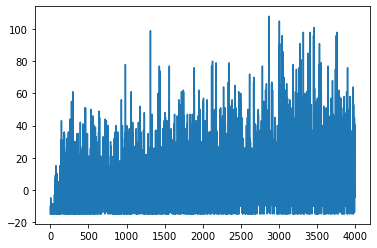

In [12]:
import pandas as pd

df = pd.read_csv(f"train.{model_name}.log.csv")
print(df["return"].describe())
df["return"].plot()

count    3501.000000
mean        6.409526
std         4.031848
min        -1.712000
25%         2.328000
50%         6.808000
75%         9.502000
max        12.946000
Name: return, dtype: float64


<AxesSubplot:>

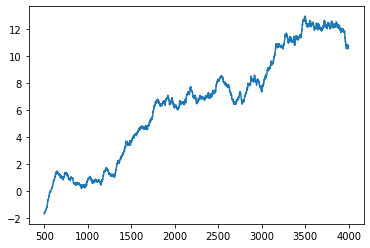

In [13]:
ma_window = 500
df_ma = (df["return"].rolling(ma_window).sum() / ma_window)
print(df_ma.describe())
df_ma.plot()

### Save

In [14]:
"""
import keras
from keras import layers as L

model = keras.Sequential([
    L.Input(18),
    L.Dense(64, activation="tanh"),
    L.Dense(64, activation="tanh"),
    L.Dense(2),
], name="mlp_input18_dense64relu2x_dense2")
model.summary()
print(model.input_shape, model.output_shape)
print("weigths:", [i.shape for i in model.get_weights()])
"""

'\nimport keras\nfrom keras import layers as L\n\nmodel = keras.Sequential([\n    L.Input(18),\n    L.Dense(64, activation="tanh"),\n    L.Dense(64, activation="tanh"),\n    L.Dense(2),\n], name="mlp_input18_dense64relu2x_dense2")\nmodel.summary()\nprint(model.input_shape, model.output_shape)\nprint("weigths:", [i.shape for i in model.get_weights()])\n'

In [15]:
# # convert to Keras SavedModel by building model then set weights because
# # agent.save(directory=f"model/tf-{model_name}", format='saved-model') would cause
# # AssertionError: Tried to export a function which references 'untracked' resource Tensor
"""
print(agent.get_architecture())
npz_path = agent.save(directory="model", format='numpy', append='episodes')
print(npz_path)
data = np.load(npz_path)
# print(data.files)

keys = [
    'policy/network/dense0/weights',
    'policy/network/dense0/bias',
    'policy/network/dense1/weights',
    'policy/network/dense1/bias',
    'policy/action_value/linear/weights',
    'policy/action_value/linear/bias',
]
model.set_weights([data[k] for k in keys])
model.save(f"model/tf")
"""

'\nprint(agent.get_architecture())\nnpz_path = agent.save(directory="model", format=\'numpy\', append=\'episodes\')\nprint(npz_path)\ndata = np.load(npz_path)\n# print(data.files)\n\nkeys = [\n    \'policy/network/dense0/weights\',\n    \'policy/network/dense0/bias\',\n    \'policy/network/dense1/weights\',\n    \'policy/network/dense1/bias\',\n    \'policy/action_value/linear/weights\',\n    \'policy/action_value/linear/bias\',\n]\nmodel.set_weights([data[k] for k in keys])\nmodel.save(f"model/tf")\n'